In [12]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Constants
Mort_rate=0.8 #Mortality rate for all age groups
age_group_weights = {
    1: 5.07,   # Average weight for 1-year-old fish
    2: 11.55,  # Average weight for 2-year-old fish
    3: 17.86,  # Average weight for 3-year-old fish
    4: 22.99   # Average weight for 4-year-old fish
}

egg_produce3=1.109e5/2 #Average agg produced for a 3-year old fish
egg_produce4=1.109e5 #Average agg produced for a 4-year old fish
fishing_ratio3=0.42/(0.42+1)
fishing_ratio4=1/(0.42+1)
#Hypothesis:
years=100
initial_pop = {
    1: 10000,   # Initial population for 1-year-old fish
    2: round(10000*(1-Mort_rate)),  # Initial population for 2-year-old fish
    3: round(10000*(1-Mort_rate)*(1-Mort_rate)),  # Initial population for 3-year-old fish
    4: round(10000*(1-Mort_rate)*(1-Mort_rate))   # Initial population for 4-year-old fish
}
Fish_rate3=0.2
Fish_rate4=fishing_ratio4*Fish_rate3/Fish_rate3






In [16]:
#Functions


def egg_survived(n): #n is the number of egg
    return 1.22e11*n/(1.22e11+n)

def next_year_pop_for_i(i,this_year_i_minius_one_pop,this_year_egg,Mort_rate,Fish_rate3,Fish_rate4):#i is the index for the age of the fish, e.g i=1 refer to fish that is 1 year old
    if i==1:
        return egg_survived(this_year_egg)
    elif i==2:
        return this_year_i_minius_one_pop*(1-Mort_rate)
    elif i==3:
        return this_year_i_minius_one_pop*(1-Mort_rate)*(1-Fish_rate3)
    else:
        return this_year_i_minius_one_pop*(1-Mort_rate)*(1-Fish_rate4)

def plot_pop(pop1,pop2,pop3,pop4):
    years=np.array(range(len(pop1)))
    plt.figure(figsize=(8, 6)) 
    plt.title("Pop-Year")
    plt.plot(years, pop1, label='1-year-old-fish')
    plt.plot(years, pop2, label='2-year-old-fish')
    plt.plot(years, pop3, label='3-year-old-fish')
    plt.plot(years, pop4, label='4-year-old-fish')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)  
    plt.show()

def plot_revenue(revenue):
    years=np.array(range(len(revenue)))
    plt.figure(figsize=(8, 6)) 
    plt.title("Revenue-Year")
    plt.plot(years, revenue, label='Revenue')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.legend()
    plt.grid(True)  
    plt.show()

def revenue(year3_fish,year4_fish,Fish_rate3,Fish_rate4,age_group_weights):
    return year3_fish*Fish_rate3*age_group_weights.get(3)+year4_fish*Fish_rate4*age_group_weights.get(4)

def model(years,initial_pop,age_group_weights,egg_produce3=egg_produce3,egg_produce4=egg_produce4,Fish_rate3=Fish_rate3,Fish_rate4=Fish_rate4):
    pop1=[initial_pop.get(1)]
    pop2=[initial_pop.get(2)]
    pop3=[initial_pop.get(3)]
    pop4=[initial_pop.get(4)]
    rev=[0]
    for i in range(years):
        pop1.append(next_year_pop_for_i(1,0,pop3[-1]*egg_produce3+pop4[-1]*egg_produce4,Mort_rate,Fish_rate3,Fish_rate4))
        pop2.append(next_year_pop_for_i(2,pop1[-1],0,Mort_rate,Fish_rate3,Fish_rate4))
        pop3.append(next_year_pop_for_i(3,pop2[-1],0,Mort_rate,Fish_rate3,Fish_rate4))
        pop4.append(next_year_pop_for_i(4,pop3[-1],0,Mort_rate,Fish_rate3,Fish_rate4))
        rev.append(revenue(pop3[-1],pop4[-1],Fish_rate3,Fish_rate4,age_group_weights))
    pop1=np.array(pop1)
    pop2=np.array(pop2)
    pop3=np.array(pop3)
    pop4=np.array(pop4)
    plot_pop(pop1,pop2,pop3,pop4)
    plot_revenue(rev)



        


    



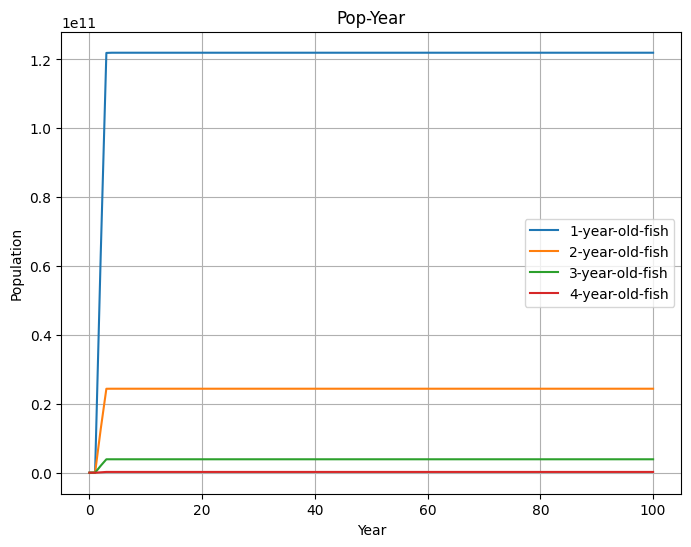

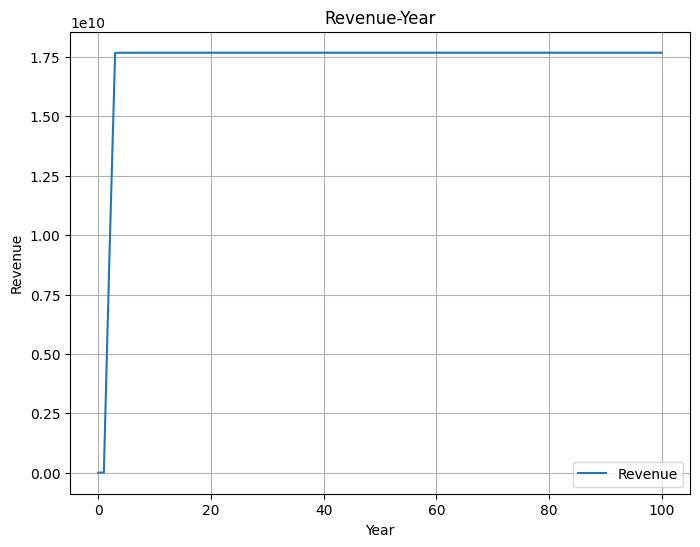

In [17]:
model(years,initial_pop,age_group_weights,egg_produce3=egg_produce3,egg_produce4=egg_produce4,Fish_rate3=Fish_rate3,Fish_rate4=Fish_rate4)
